In [1]:
import numpy as np

In [2]:
import tensorflow as tf

C:\Users\Chandana\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Chandana\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Chandana\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Chandana\Anaconda3\envs\tensorflow\lib\s

In [3]:
import tensorflow.keras 

In [4]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, UpSampling2D, Dropout, Input

In [5]:
from tensorflow.keras.preprocessing.image import img_to_array

In [6]:
import matplotlib.pyplot as plt

In [7]:
import cv2

In [8]:
from tqdm import tqdm 

In [9]:
import os

In [10]:
import re

In [11]:
def sorted_alphanumeric(data):  
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)',key)]
    return sorted(data,key = alphanum_key)

In [12]:
SIZE = 256

In [13]:
image_path = 'photos'
img_array = []

In [14]:
sketch_path = 'sketches'
sketch_array = []

In [15]:
image_file = sorted_alphanumeric(os.listdir(image_path))
sketch_file = sorted_alphanumeric(os.listdir(sketch_path))

In [16]:
for i in tqdm(image_file):
    image = cv2.imread(image_path + '/' + i,1)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (SIZE, SIZE))
    image = image.astype('float32') / 255.0 
    img_array.append(img_to_array(image))
    img1 = cv2.flip(image,1)
    img_array.append(img_to_array(img1))
    img2 = cv2.flip(image,-1)
    img_array.append(img_to_array(img2))
    img3 = cv2.flip(image,-1)
    img3 = cv2.flip(img3,1)
    img_array.append(img_to_array(img3)) 
    img4 = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
    img_array.append(img_to_array(img4))
    img5 = cv2.flip(img4,1)
    img_array.append(img_to_array(img5)) 
    img6 = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)
    img_array.append(img_to_array(img6))
    img7 = cv2.flip(img6,1)
    img_array.append(img_to_array(img7))

100%|██████████| 188/188 [00:04<00:00, 38.17it/s]


In [17]:
for i in tqdm(sketch_file):
    image = cv2.imread(sketch_path + '/' + i,1)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (SIZE, SIZE))
    image = image.astype('float32') / 255.0
    sketch_array.append(img_to_array(image))
    img1 = cv2.flip(image,1)
    sketch_array.append(img_to_array(img1))
    img2 = cv2.flip(image,-1)
    sketch_array.append(img_to_array(img2))
    img3 = cv2.flip(image,-1)
    img3 = cv2.flip(img3,1)
    sketch_array.append(img_to_array(img3))
    img4 = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
    sketch_array.append(img_to_array(img4))
    img5 = cv2.flip(img4,1)
    sketch_array.append(img_to_array(img5))
    img6 = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)
    sketch_array.append(img_to_array(img6))
    img7 = cv2.flip(img6,1)
    sketch_array.append(img_to_array(img7))

100%|██████████| 188/188 [00:07<00:00, 26.37it/s]


In [18]:
print("Total number of sketch images:",len(sketch_array))
print("Total number of images:",len(img_array))

Total number of sketch images: 1504
Total number of images: 1504


In [19]:
def plot_images(image, sketches):
    plt.figure(figsize=(7,7))
    plt.subplot(1,2,1)
    plt.title('Image', color = 'green', fontsize = 20)
    plt.imshow(image)
    plt.subplot(1,2,2)
    plt.title('Sketches ', color = 'black', fontsize = 20)
    plt.imshow(sketches)
   
    plt.show()

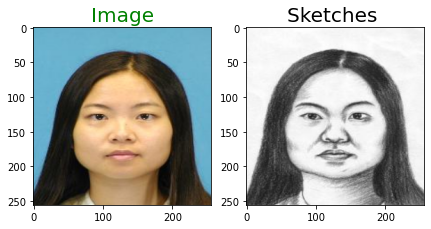

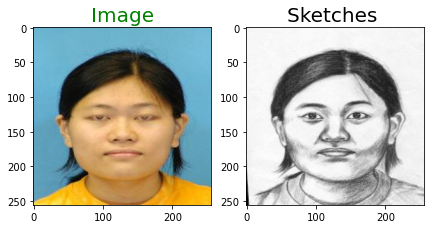

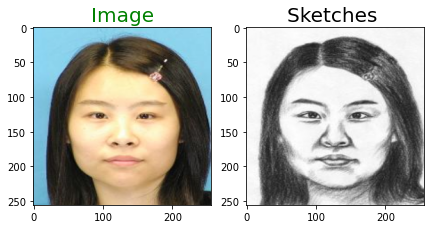

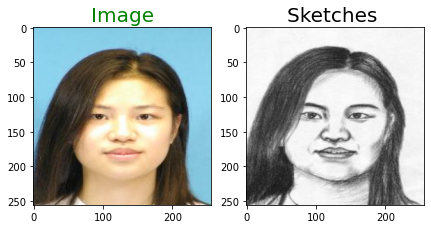

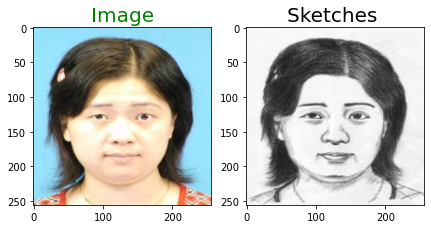

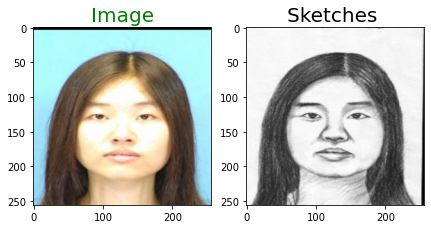

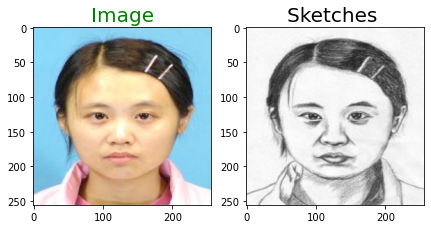

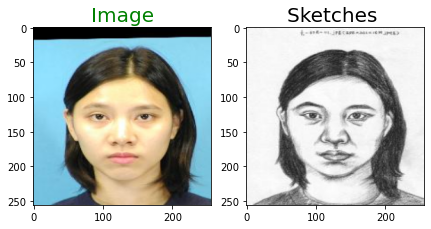

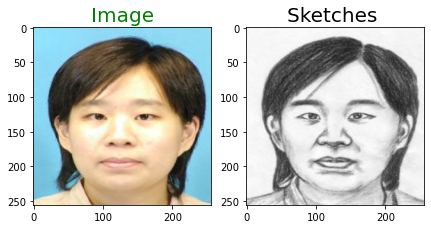

In [20]:
ls = [i for i in range(0,65,8)]
for i in ls:
    plot_images(img_array[i],sketch_array[i])


In [21]:
train_sketch_image = sketch_array[:1400]
train_image = img_array[:1400]

In [22]:
test_sketch_image = sketch_array[1400:]
test_image = img_array[1400:]

In [23]:
train_sketch_image = np.reshape(train_sketch_image,(len(train_sketch_image),SIZE,SIZE,3))
train_image = np.reshape(train_image, (len(train_image),SIZE,SIZE,3))
print('Train color image shape:',train_image.shape)

Train color image shape: (1400, 256, 256, 3)


In [24]:
test_sketch_image = np.reshape(test_sketch_image,(len(test_sketch_image),SIZE,SIZE,3))
test_image = np.reshape(test_image, (len(test_image),SIZE,SIZE,3))
print('Test color image shape',test_image.shape)

Test color image shape (104, 256, 256, 3)


In [25]:
encoder_input = tensorflow.keras.Input(shape=(SIZE,SIZE, 3), name="img")
x = Conv2D(filters = 16, kernel_size = (3,3), activation = 'relu', padding = 'same')(encoder_input)
x = MaxPool2D(pool_size = (2,2))(x)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [26]:
x = Conv2D(filters = 32,kernel_size = (3,3),strides = (2,2), activation = 'relu', padding = 'valid')(x)
x = Conv2D(filters = 64, kernel_size = (3,3), strides = (2,2), activation = 'relu', padding = 'same')(x)
x = MaxPool2D(pool_size = (2,2))(x)

In [27]:
x = Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu', padding = 'same')(x)
x = Conv2D(filters = 256 , kernel_size = (3,3), activation = 'relu', padding = 'same')(x) 
encoder_output = Conv2D(filters = 512 , kernel_size = (3,3), activation = 'relu', padding = 'same')(x) 
encoder = tf.keras.Model(encoder_input, encoder_output)

In [28]:
decoder_input = Conv2D(filters = 512 ,kernel_size = (3,3), activation = 'relu', padding = 'same')(encoder_output)
x = UpSampling2D(size = (2,2))(decoder_input)
x = Conv2D(filters = 256, kernel_size = (3,3), activation = 'relu', padding = 'same')(x)
x = Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu', padding = 'same')(x)
x = UpSampling2D(size = (2,2) )(x)

In [29]:
x = Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', padding = 'same')(x)
x = UpSampling2D(size = (2,2) )(x)
x = Conv2D(filters = 32 , kernel_size = (3,3), activation = 'relu', padding = 'same')(x)
x = UpSampling2D(size = (2,2) )(x)

In [30]:
x = Conv2D(filters = 16  , kernel_size = (3,3), activation = 'relu', padding = 'same')(x)
decoder_output = Conv2D(filters = 3, kernel_size = (3,3), activation = 'relu', padding = 'same')(x)

In [31]:
model = tensorflow.keras.Model(encoder_input, decoder_output)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 256, 256, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 63, 63, 32)        4640      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       7385

In [32]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), loss = 'mean_absolute_error',
              metrics = ['acc'])

model.fit(train_image, train_sketch_image, epochs = 100)

Epoch 1/100
1400/1400 [==============================] - 1021s 729ms/sample - loss: 0.6289 - acc: 0.4832
Epoch 2/100
1400/1400 [==============================] - 1249s 892ms/sample - loss: 0.1834 - acc: 0.3112
Epoch 3/100
1400/1400 [==============================] - 1052s 751ms/sample - loss: 0.1076 - acc: 0.3061
Epoch 4/100
1400/1400 [==============================] - 1014s 724ms/sample - loss: 0.0961 - acc: 0.4212
Epoch 5/100
1400/1400 [==============================] - 1025s 732ms/sample - loss: 0.0881 - acc: 0.4584
Epoch 6/100
1400/1400 [==============================] - 973s 695ms/sample - loss: 0.0879 - acc: 0.4354
Epoch 7/100
1400/1400 [==============================] - 671s 479ms/sample - loss: 0.0842 - acc: 0.4508
Epoch 8/100
1400/1400 [==============================] - 657s 470ms/sample - loss: 0.0832 - acc: 0.4594
Epoch 9/100
1400/1400 [==============================] - 673s 481ms/sample - loss: 0.0814 - acc: 0.4416
Epoch 10/100
1400/1400 [==============================] - 6

Epoch 79/100
1400/1400 [==============================] - 1044s 745ms/sample - loss: 0.0562 - acc: 0.4506
Epoch 80/100
1400/1400 [==============================] - 1098s 784ms/sample - loss: 0.0559 - acc: 0.4964
Epoch 81/100
1400/1400 [==============================] - 1023s 731ms/sample - loss: 0.0560 - acc: 0.4728
Epoch 82/100
1400/1400 [==============================] - 2172s 2s/sample - loss: 0.0562 - acc: 0.4837
Epoch 83/100
1400/1400 [==============================] - 842s 602ms/sample - loss: 0.0552 - acc: 0.4730
Epoch 84/100
1400/1400 [==============================] - 889s 635ms/sample - loss: 0.0553 - acc: 0.4789
Epoch 85/100
1400/1400 [==============================] - 780s 557ms/sample - loss: 0.0552 - acc: 0.4758
Epoch 86/100
1400/1400 [==============================] - 728s 520ms/sample - loss: 0.0542 - acc: 0.4572
Epoch 87/100
1400/1400 [==============================] - 730s 522ms/sample - loss: 0.0543 - acc: 0.4905
Epoch 88/100
1400/1400 [==============================

In [33]:
prediction_on_test_data = model.evaluate(test_image, test_sketch_image)
print("Loss: ", prediction_on_test_data[0])
print("Accuracy: ", np.round(prediction_on_test_data[1] * 100,1)) 

104/104 [==============================] - 12s 112ms/sample - loss: 0.0746 - acc: 0.6397
Loss:  0.0746445907996251
Accuracy:  64.0


In [34]:
def show_images(real,sketch, predicted):
    plt.figure(figsize = (9,9))
    plt.subplot(1,3,1)
    plt.title("Image",fontsize = 15, color = 'Lime')
    plt.imshow(real)
    plt.subplot(1,3,2)
    plt.title("sketch",fontsize = 15, color = 'Blue')
    plt.imshow(sketch)
    plt.subplot(1,3,3)
    plt.title("Predicted",fontsize = 15, color = 'gold')
    plt.imshow(predicted)

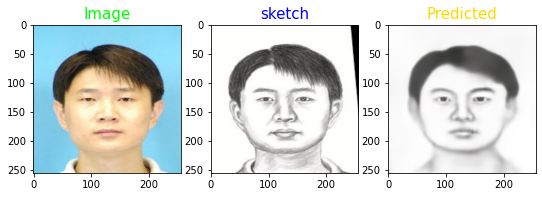

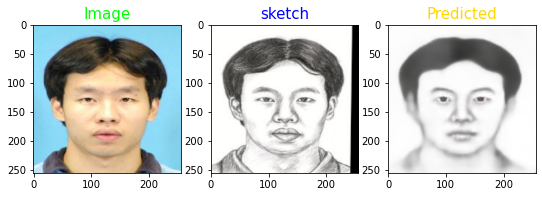

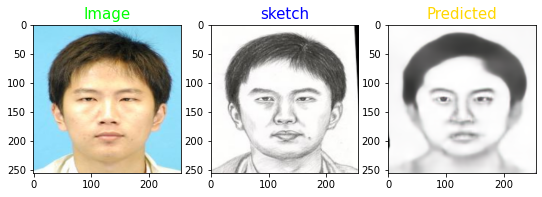

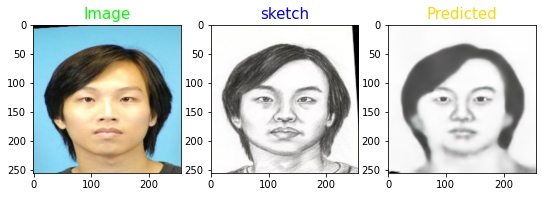

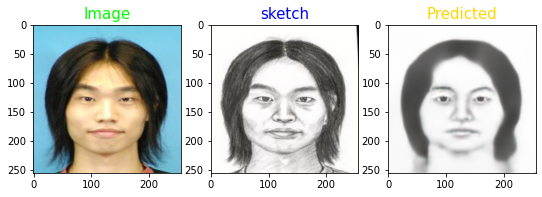

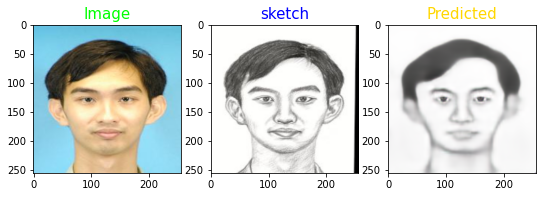

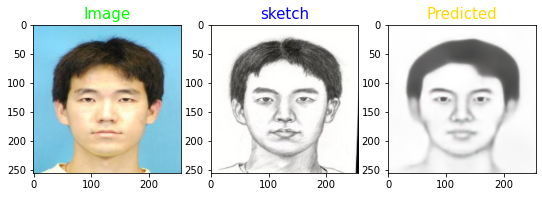

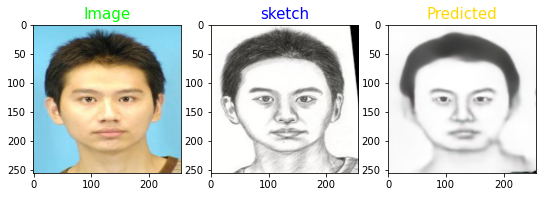

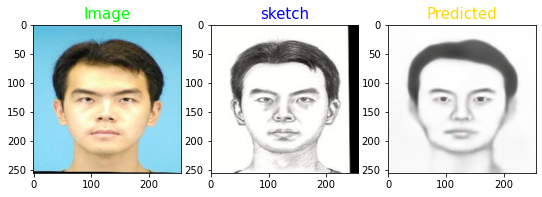

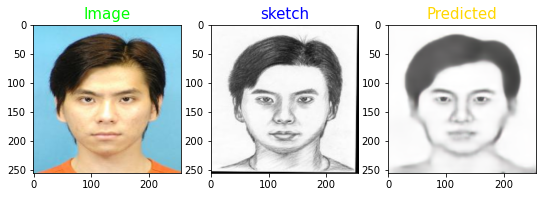

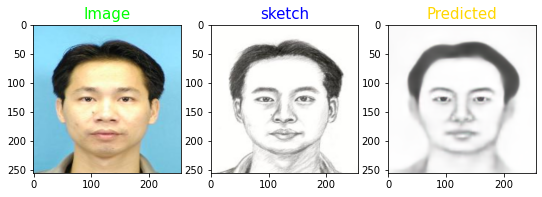

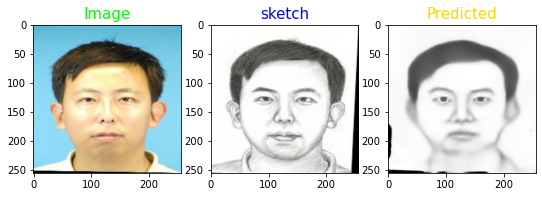

In [35]:
ls = [i for i in range(0,95,8)]
for i in ls:
    predicted =np.clip(model.predict(test_image[i].reshape(1,SIZE,SIZE,3)),0.0,1.0).reshape(SIZE,SIZE,3)
    show_images(test_image[i],test_sketch_image[i],predicted)

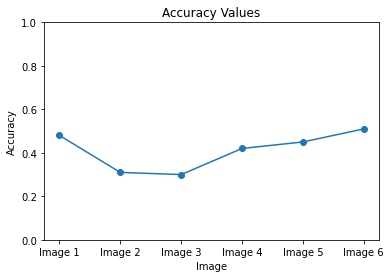

In [43]:
import matplotlib.pyplot as plt

 
accuracy_values = [0.48, 0.31, 0.30, 0.42, 0.45, 0.51]

# Create x-axis values
x_values = [f"Image {i+1}" for i in range(len(accuracy_values))]

# Plot line graph
plt.plot(x_values, accuracy_values, marker='o')
plt.title('Accuracy Values')
plt.xlabel('Image')
plt.ylabel('Accuracy')
plt.ylim([0, 1])  # Set y-axis limits to 0 and 1
plt.show()
